In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_Smart-seq2_Diaphragm

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A8.D042105.3_11_M.1.1,skeletal muscle satellite stem cell,CL:0008011,skeletal muscle satellite stem cell,D042105,0.0,Quake_Smart-seq2_Diaphragm,3_11_M,,M,Diaphragm,Mus musculus,Smart-seq2,
K10.D042105.3_11_M.1.1,mesenchymal stem cell,CL:0000134,mesenchymal stem cell,D042105,1.0,Quake_Smart-seq2_Diaphragm,3_11_M,,M,Diaphragm,Mus musculus,Smart-seq2,
L13.D042105.3_11_M.1.1,mesenchymal stem cell,CL:0000134,mesenchymal stem cell,D042105,1.0,Quake_Smart-seq2_Diaphragm,3_11_M,,M,Diaphragm,Mus musculus,Smart-seq2,
M15.D042105.3_11_M.1.1,endothelial cell,CL:0000115,endothelial cell,D042105,3.0,Quake_Smart-seq2_Diaphragm,3_11_M,,M,Diaphragm,Mus musculus,Smart-seq2,
N17.D042105.3_11_M.1.1,endothelial cell,CL:0000115,endothelial cell,D042105,3.0,Quake_Smart-seq2_Diaphragm,3_11_M,,M,Diaphragm,Mus musculus,Smart-seq2,


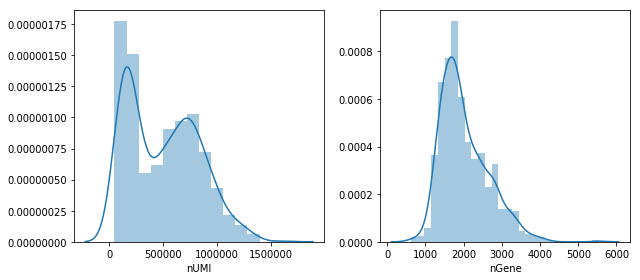

In [2]:
quake_smart_seq2_diaphragm = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Diaphragm/data.h5")
utils.peek(quake_smart_seq2_diaphragm, "Quake_Smart-seq2_Diaphragm")
quake_smart_seq2_diaphragm = quake_smart_seq2_diaphragm.normalize()
quake_smart_seq2_diaphragm.obs.head()

In [3]:
#opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_diaphragm_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_diaphragm, quake_smart_seq2_diaphragm.uns["seurat_genes"],
    **fixed_model_kwargs, #**opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Diaphragm/model_0"
)
quake_smart_seq2_diaphragm.latent = quake_smart_seq2_diaphragm_model.inference(quake_smart_seq2_diaphragm)

[DIRECTi epoch 0] train=2.622, val=2.698, time elapsed=1.2s Best save...
[DIRECTi epoch 1] train=2.619, val=2.696, time elapsed=0.1s Best save...
[DIRECTi epoch 2] train=2.619, val=2.694, time elapsed=0.1s Best save...
[DIRECTi epoch 3] train=2.616, val=2.691, time elapsed=0.1s Best save...
[DIRECTi epoch 4] train=2.612, val=2.688, time elapsed=0.1s Best save...
[DIRECTi epoch 5] train=2.609, val=2.685, time elapsed=0.1s Best save...
[DIRECTi epoch 6] train=2.605, val=2.681, time elapsed=0.1s Best save...
[DIRECTi epoch 7] train=2.600, val=2.677, time elapsed=0.1s Best save...
[DIRECTi epoch 8] train=2.600, val=2.673, time elapsed=0.1s Best save...
[DIRECTi epoch 9] train=2.595, val=2.669, time elapsed=0.1s Best save...
[DIRECTi epoch 10] train=2.589, val=2.664, time elapsed=0.1s Best save...
[DIRECTi epoch 11] train=2.583, val=2.659, time elapsed=0.1s Best save...
[DIRECTi epoch 12] train=2.578, val=2.653, time elapsed=0.1s Best save...
[DIRECTi epoch 13] train=2.572, val=2.646, time 

[  Info   ] Computing tSNE...


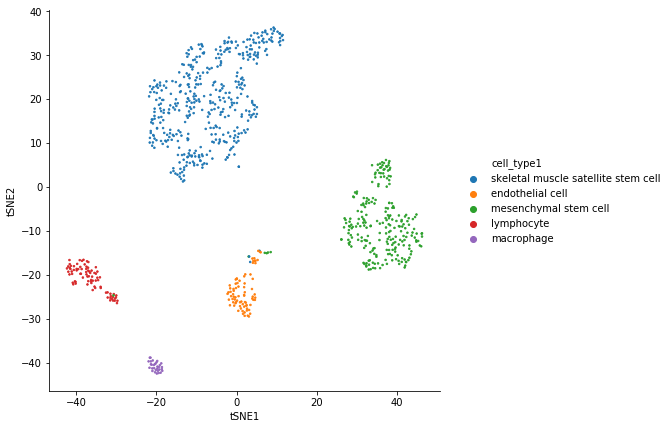

In [4]:
plot = quake_smart_seq2_diaphragm.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Diaphragm/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


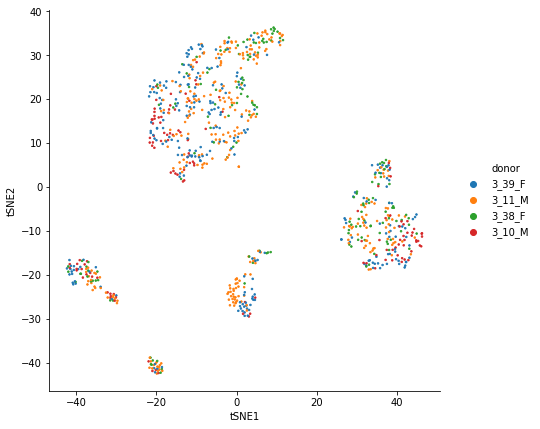

In [5]:
plot = quake_smart_seq2_diaphragm.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Diaphragm/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


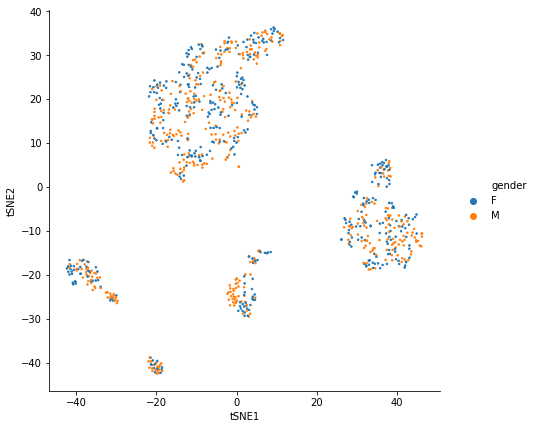

In [6]:
plot = quake_smart_seq2_diaphragm.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Diaphragm/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_smart_seq2_diaphragm_models = [quake_smart_seq2_diaphragm_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_diaphragm_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_diaphragm, quake_smart_seq2_diaphragm.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Diaphragm/model_%d" % i
    ))
quake_smart_seq2_diaphragm_blast = cb.blast.BLAST(quake_smart_seq2_diaphragm_models, quake_smart_seq2_diaphragm, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_diaphragm_blast.save("Quake_Smart-seq2_Diaphragm")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Diaphragm/model_1/checkpoint-217
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Diaphragm/model_2/checkpoint-202
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Diaphragm/model_3/checkpoint-181


In [8]:
with open("Quake_Smart-seq2_Diaphragm/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Diaphragm/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_smart_seq2_diaphragm_blast, "Quake_Smart-seq2_Diaphragm")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9034
Accuracy = 0.9987
